# Initial data inspection and plotting


In [1]:
import pathlib

from rich import print

import cellpy
from cellpy.utils import plotutils

<div class="admonition hint">
    <p class="admonition-title">Hint</p>
    <p>
    If you have <code class="docutils literal notranslate"><span class="pre">plotly</span></code> installed, some of the functions will produce interactive plots. If not, the output will be simpler <code class="docutils literal notranslate"><span class="pre">matplotlib</span></code> figures. If you have not installed <code class="docutils literal notranslate"><span class="pre">plotly</span></code>, you can do so by running <code class="docutils literal notranslate"><span class="pre">pip install plotly</span></code>.
    </p>
</div>

In [2]:
# Comment out this when running the notebook locally to get interactive plots
import plotly.io as pio
pio.renderers.default = "png"

Either load raw data or your saved cellpy files:

In [3]:
filedir = pathlib.Path("data")  # foldername within the same directory
c = cellpy.get(filedir / "out" / "20210210_FC.h5")

## Looking at the data
Your **CellpyCell** object (here called `c`) contains all your raw data as well as some additional elements, in the format of pandas DataFrames:

- **Raw data**: `c.data.raw`, raw data from the run (with units `c.data.raw_units`)
- **Summary**: `c.data.summary` with cycle-based summaries
- **Steps**: `c.data.steps` with Stats from each step (and step type), created using the `c.make_step_table` method

In [4]:
c.data.raw.head(2)

,test_id,data_point,test_time,step_time,date_time,step_index,cycle_index,is_fc_data,current,voltage,charge_capacity,discharge_capacity,charge_energy,discharge_energy,dv_dt,internal_resistance,ac_impedance,aci_phase_angle
data_point,,,,,,,,,,,,,,,,,,
1,1,1,5.008961,5.008961,2021-05-10 10:14:45,1,1,0,0.0,3.051165,0.0,0.0,0.0,0.0,-0.000061,0.0,0.0,0.0
2,1,2,10.019319,10.019319,2021-05-10 10:14:50,1,1,0,0.0,3.051165,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [5]:
c.data.summary.head(2)

,data_point,test_time,date_time,end_voltage_charge,end_voltage_discharge,charge_capacity,discharge_capacity,coulombic_efficiency,cumulated_coulombic_efficiency,cumulated_charge_capacity,...,cumulated_charge_capacity_areal,cumulated_discharge_capacity_areal,coulombic_difference_areal,cumulated_coulombic_difference_areal,discharge_capacity_loss_areal,charge_capacity_loss_areal,cumulated_discharge_capacity_loss_areal,cumulated_charge_capacity_loss_areal,shifted_charge_capacity_areal,shifted_discharge_capacity_areal
cycle_index,,,,,,,,,,,,,,,,,,,,,
1,5797,174328.601353,2021-05-12 10:40:11,4.200052,3.129170,0.003819,0.003324,87.049469,87.049469,0.003819,...,3.818560,3.324036,0.494524,0.494524,NaN,NaN,NaN,NaN,0.494524,4.313083
2,7188,317161.773416,2021-05-14 02:20:47,4.200052,3.188442,0.003422,0.003234,94.510786,181.560255,0.007241,...,7.240795,6.558417,0.187854,0.682378,0.089654,0.396324,0.089654,0.396324,0.682378,4.104613


In [6]:
c.data.steps.head(2)

,index,cycle,step,sub_step,point_avr,point_std,point_min,point_max,point_first,point_last,...,ir_std,ir_min,ir_max,ir_first,ir_last,ir_delta,rate_avr,type,sub_type,info
0,0,1,1,1,2157.5,1245.48886,1,4314,1,4314,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,rest,NaN,
1,1,1,2,1,4315.0,NaN,4315,4315,4315,4315,...,NaN,6.650723,6.650723,6.650723,6.650723,0.0,1.75791,ir,NaN,


## Simple plotting

The `plotutils` module contains several convenient plot functions:

### Raw plots

The `raw_plot` gives an overview of your datacollection, plotting voltage vs time:


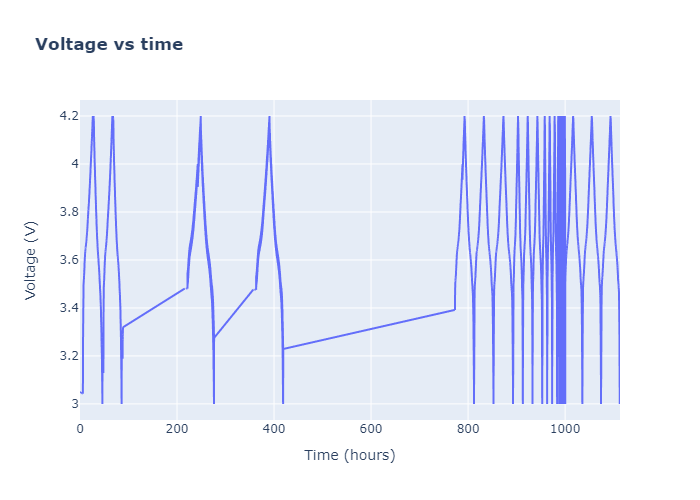

In [7]:
plotutils.raw_plot(c, title="Voltage vs time")

### Cycle info plots

The `cycle_info_plot` function plots the raw data together with step and cycle info:


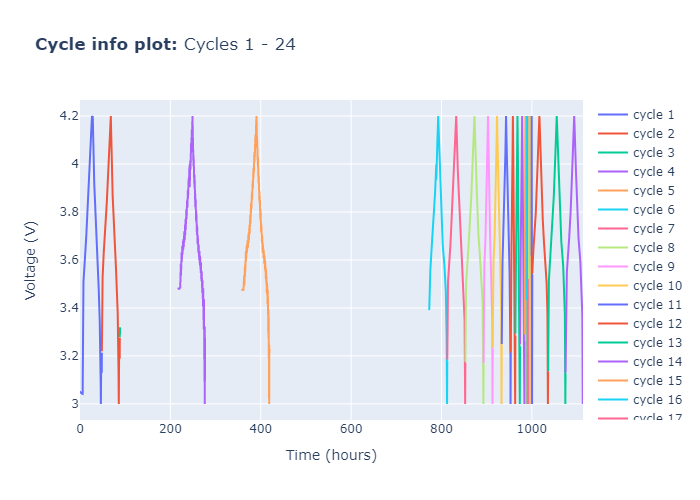

In [8]:
plotutils.cycle_info_plot(c, title="Cycle info plot:")

These plot functions offer some flexibility. You can, e.g. select specific cycles to look at, or adjust the units of the plot variables:


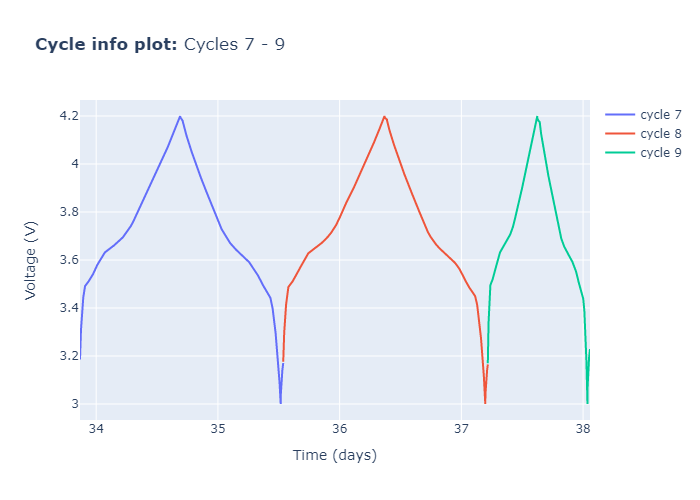

In [9]:
plotutils.cycle_info_plot(c, cycle=[7, 8, 9], title="Cycle info plot:", t_unit="days")

## Summary plots

`summary_plots` allows you to plot different summary variables. You can inspect the columns of `c.data.summary` to check what variables are available.


In [10]:
print(c.data.summary.columns)

Index(['data_point', 'test_time', 'date_time', 'end_voltage_charge',
       'end_voltage_discharge', 'charge_capacity', 'discharge_capacity',
       'coulombic_efficiency', 'cumulated_coulombic_efficiency',
       'cumulated_charge_capacity', 'cumulated_discharge_capacity',
       'discharge_capacity_loss', 'charge_capacity_loss',
       'coulombic_difference', 'cumulated_coulombic_difference',
       'cumulated_discharge_capacity_loss', 'cumulated_charge_capacity_loss',
       'shifted_charge_capacity', 'shifted_discharge_capacity',
       'cumulated_ric', 'cumulated_ric_sei', 'cumulated_ric_disconnect',
       'normalized_cycle_index', 'charge_c_rate', 'discharge_c_rate',
       'discharge_capacity_gravimetric', 'charge_capacity_gravimetric',
       'cumulated_charge_capacity_gravimetric',
       'cumulated_discharge_capacity_gravimetric',
       'coulombic_difference_gravimetric',
       'cumulated_coulombic_difference_gravimetric',
       'discharge_capacity_loss_gravimetric',
       'charge_capacity_loss_gravimetric',
       'cumulated_discharge_capacity_loss_gravimetric',
       'cumulated_charge_capacity_loss_gravimetric',
       'shifted_charge_capacity_gravimetric',
       'shifted_discharge_capacity_gravimetric', 'discharge_capacity_areal',
       'charge_capacity_areal', 'cumulated_charge_capacity_areal',
       'cumulated_discharge_capacity_areal', 'coulombic_difference_areal',
       'cumulated_coulombic_difference_areal', 'discharge_capacity_loss_areal',
       'charge_capacity_loss_areal', 'cumulated_discharge_capacity_loss_areal',
       'cumulated_charge_capacity_loss_areal', 'shifted_charge_capacity_areal',
       'shifted_discharge_capacity_areal'],
      dtype='object')

Here is one example:


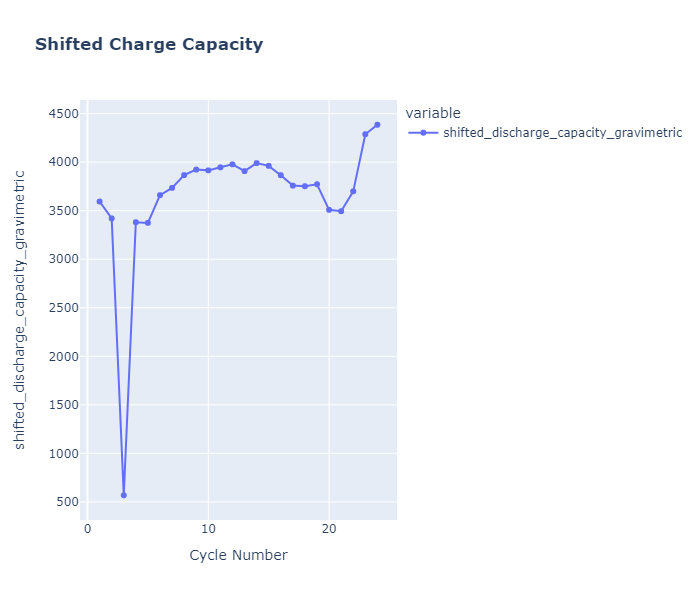

In [11]:
plotutils.summary_plot(
    c,
    y="shifted_discharge_capacity_gravimetric",
    title="<b>Shifted Charge Capacity</b>",
)

The `summary_plot` function also have some pre-defined sets of variables for plotting the most common variables.


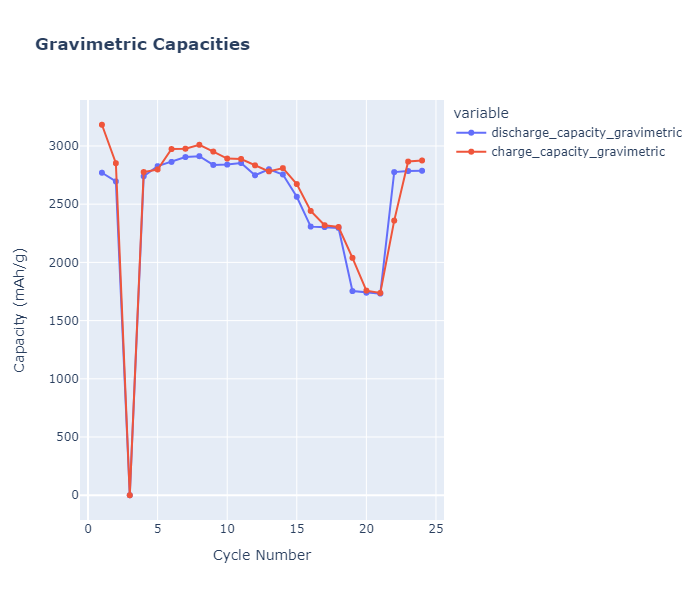

In [12]:
plotutils.summary_plot(
    c, y="capacities_gravimetric", title="<b>Gravimetric Capacities</b>"
)

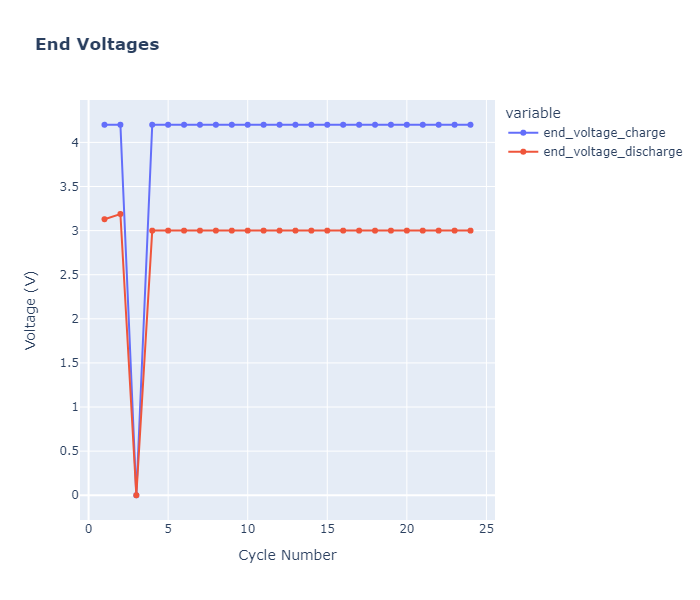

In [13]:
plotutils.summary_plot(c, y="voltages", title="<b>End Voltages</b>")

The pre-defined variable sets for the summary plots are: 
- "voltages"
- "capacities_gravimetric"
- "capacities_areal"
- "capacities_gravimetric_split_constant_voltage"
- "capacities_areal_split_constant_voltage"